In [1]:
# Import required packages

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.axes as ax
import matplotlib.pyplot as plt

In [2]:
# Import the data set
df = pd.read_csv("data.csv")

In [3]:
# Display the first 10 rows in the data set
df.head(n=10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [4]:
# Get info on the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

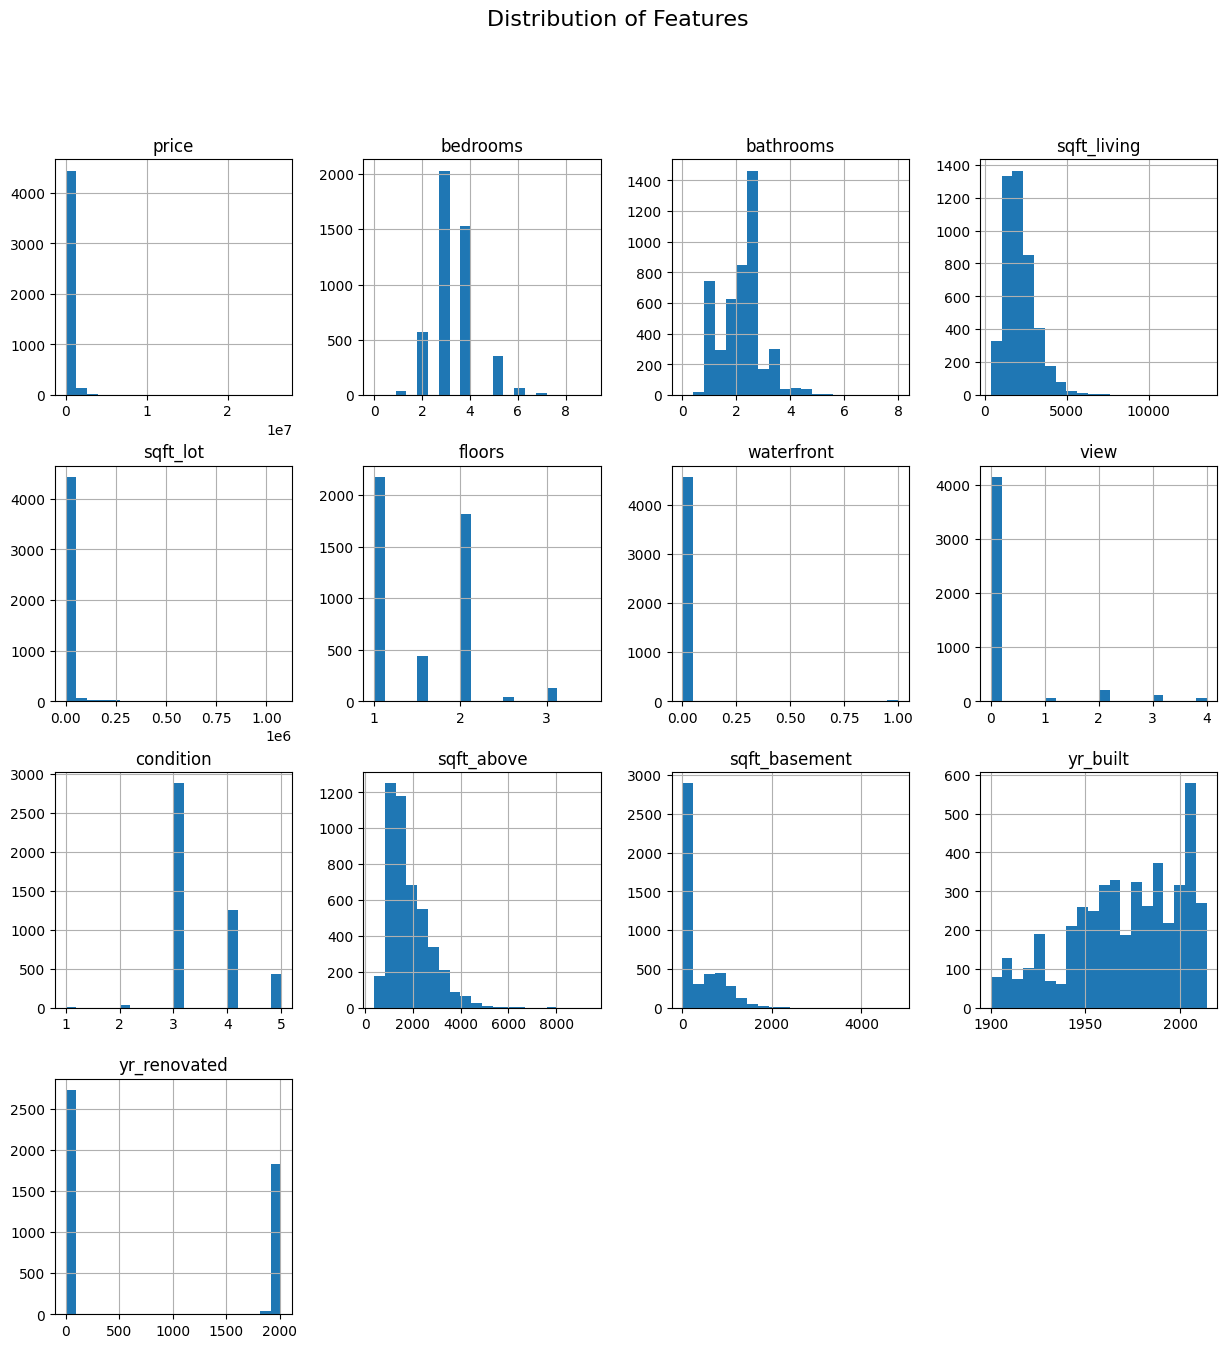

In [5]:
# Create some histogram plots to get an idea of the distribution for each feature

# Plot histograms for each feature
df.hist(figsize=(15, 15), bins=20)
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

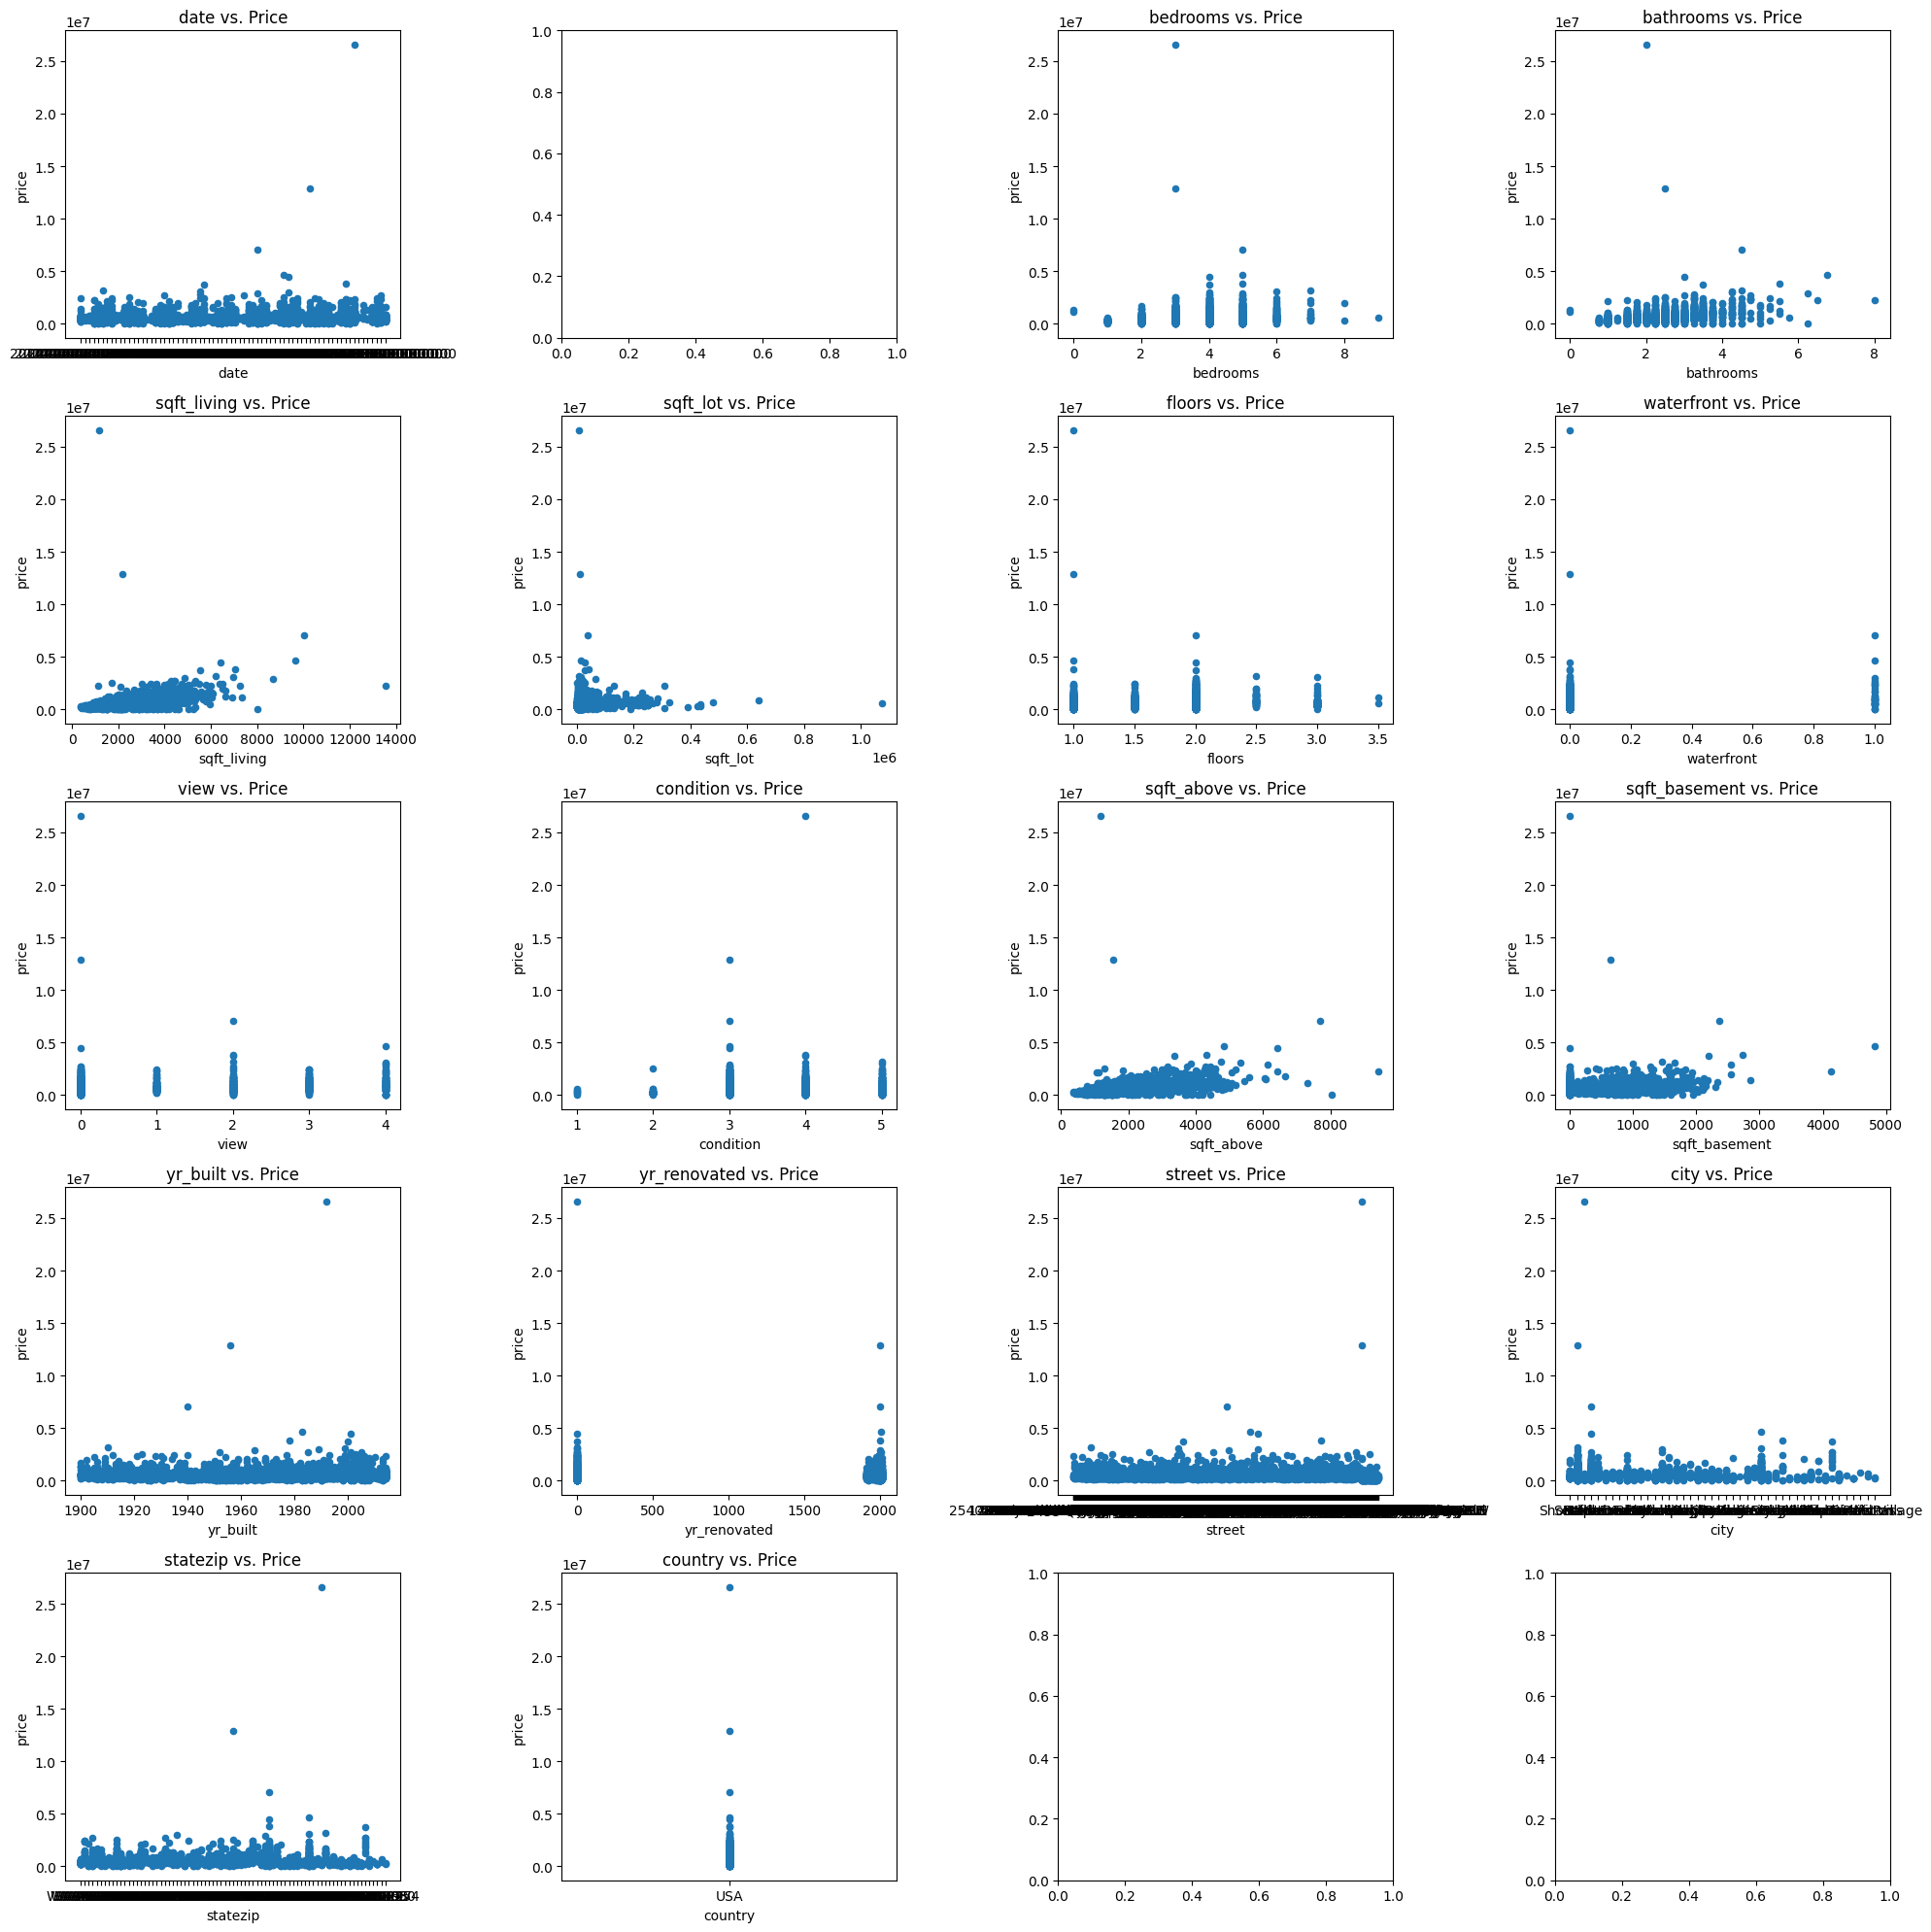

In [60]:
# Let's create some plots and get an idea of how each feature affects the price
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

# Create subplots

# This creates a grid of subplots arranged in a 5x4 grid (5 rows and 4 columns) within a single figure.
# axes is an array where each element corresponds to a subplot's position in the grid. Ex: axes[0, 0] represents the subplot at the top-left corner
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Plot each feature against the price
for i, column in enumerate(df.columns):
    if column != 'price':
        df.plot(kind='scatter', x=column, y='price', ax=axes[i])
        axes[i].set_title(f'{column} vs. Price')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [61]:
# There is no CLEAR relationship between the price and any of the features in the dataset. So we'll need to do some further refinement to identify which features have the most impact on price.
# To do this we will use Mutual Information on the features and price. Mutual information(MI) is basically the amount of information once variable gives about another, meaning it measures the dependency between two variables.

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

# Split features
X_train,X_test,y_train,y_test = train_test_split(df.drop(labels=['price'], axis=1), df['price'], test_size=0.3, random_state=0)

def make_mi_score(X, y):
    X.copy()
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()

    discrete_features = X.dtypes == int
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=42)
    mi_scores = pd.Series(mi_scores, name='Mutual Information', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    return mi_scores

mutual_info = make_mi_score(X_train.fillna(0), y_train)
mutual_info



street           0.982492
statezip         0.462048
city             0.318284
sqft_living      0.282462
bathrooms        0.167868
sqft_above       0.167262
sqft_lot         0.119854
bedrooms         0.080941
floors           0.068100
yr_built         0.060567
view             0.056260
sqft_basement    0.037143
yr_renovated     0.020688
date             0.014301
waterfront       0.003025
condition        0.001135
country          0.000000
Name: Mutual Information, dtype: float64

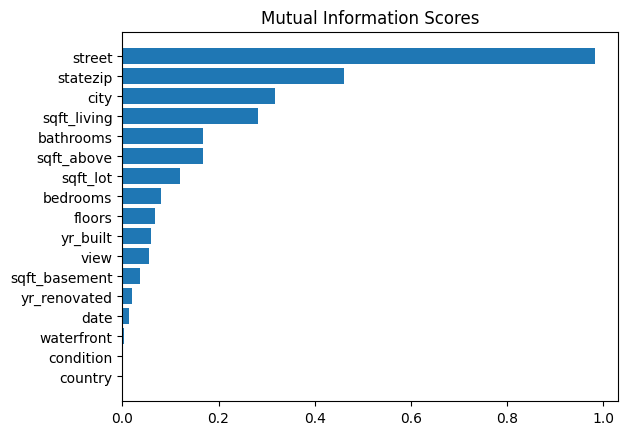

In [62]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plot_mi_scores(mutual_info)

In [130]:
# TODO: Encode str features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

df_transformed = df.apply(LabelEncoder().fit_transform)

# Split features
X_train2,X_test2,y_train2,y_test2 = train_test_split(df_transformed.drop(labels=['price'], axis=1), df_transformed['price'], test_size=0.3, random_state=0)

mutual_info = make_mi_score(X_train2.fillna(0), y_train2)
mutual_info

X_train2


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4452,32,3,2,53,1102,2,0,0,2,56,0,42,44,46,35,65,0
2457,42,5,9,369,2679,2,0,0,3,219,122,75,0,915,42,41,0
1390,25,3,7,246,3080,2,0,0,2,245,0,79,59,2644,31,32,0
3402,55,4,5,206,3061,0,0,0,2,142,51,64,45,2966,13,14,0
3197,53,4,8,258,2966,2,0,0,2,257,0,94,0,2214,31,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,18,3,4,84,161,4,0,0,2,88,0,107,0,4456,35,54,0
3264,53,2,2,44,813,0,0,0,2,48,0,56,46,3458,35,57,0
1653,29,5,9,205,2315,2,0,0,2,205,0,87,45,1956,33,42,0
2607,45,4,8,340,2796,0,0,3,3,204,109,50,28,2743,22,24,0


In [119]:
from scipy import sparse

X_num = df.select_dtypes(exclude='object')
X_cat = df.select_dtypes(include='object')

encoder = OneHotEncoder(handle_unknown='ignore')

X_encoded = sparse.csr_matrix(encoder.fit_transform(X_cat))
som = np.array(X_encoded.toarray())
print(som)
print(type(som))
print(type(X_encoded))
# print(X_encoded.index)

enc_df = pd.DataFrame(som)

df_transformedv2 = X_num.join(enc_df)


# one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns)

# df_transformedv2 = X_num.join(one_hot_features)

# Split features
X_train3,X_test3,y_train3,y_test3 = train_test_split(df_transformedv2.drop(labels=['price'], axis=1), df_transformedv2['price'], test_size=0.3, random_state=0)
# 
mutual_info2 = make_mi_score(X_train2.fillna(0), y_train2)
mutual_info2

#print(X_train3)
# print(pd.DataFrame(X_train2))
print(pd.DataFrame(X_train3))

[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
<class 'numpy.ndarray'>
<class 'scipy.sparse._csr.csr_matrix'>
      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
4452       3.0       1.00         1040      6860     2.0           0     0   
2457       5.0       2.75         3320     23760     2.0           0     0   
1390       3.0       2.25         2370    217800     2.0           0     0   
3402       4.0       1.75         2085    174240     1.0           0     0   
3197       4.0       2.50         2450     55387     2.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
1033       3.0       1.50         1270      1443     3.0           0     0   
3264       2.0       1.00          970      5500     1.0           0     0   
1653       5.0       2.75         2080     13189     2.0           0     0   
2

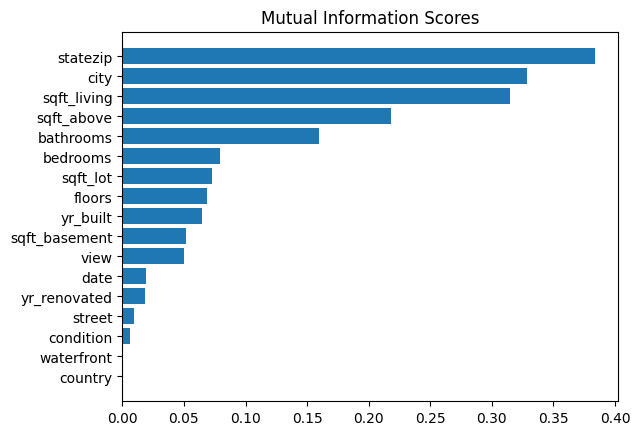

In [120]:
mutual_info_scores = mutual_info_regression(X_train2, y_train2, random_state=42)
mutual_info_scores = pd.Series(mutual_info_scores)
mutual_info_scores.index = X_train2.columns
mutual_info_scores = mutual_info_scores.sort_values(ascending=False)

plot_mi_scores(mutual_info_scores)



In [131]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train2.fillna(0), y_train2)
selected_top_columns.get_support()

print(type(mutual_info))

X_train2.columns[selected_top_columns.get_support()]

<class 'pandas.core.series.Series'>


Index(['sqft_living', 'sqft_above', 'city', 'statezip'], dtype='object')

In [146]:
df_updated = X_train2[X_train2.columns[selected_top_columns.get_support()]]
# df_updated = pd.DataFrame(df_updated.join(y_train2))

df_updated.dropna()
df_updated.isna().sum()

print(pd.DataFrame(df_transformed).shape)
print(df_updated.shape)
print(X_train2.shape)
print(y_train2.shape)


(4600, 18)
(3220, 4)
(3220, 17)
(3220,)


In [147]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_updated,y_train2)

LinearRegression()

In [148]:
model.score(df_updated,y_train2)

0.45396436673873297

In [149]:
X_test_updated = X_test[X_test.columns[selected_top_columns.get_support()]]

predictions = model.predict(X_test_updated)
predictions

ValueError: could not convert string to float: 'Covington'